In [1]:
from tensorflow.keras.datasets import cifar10
import pandas as pd

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [4]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [8]:
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 33s 669us/sample - loss: 1.4890 - accuracy: 0.4636 - val_loss: 1.2634 - val_accuracy: 0.5451
Epoch 2/20
50000/50000 [==============================] - 34s 672us/sample - loss: 1.1718 - accuracy: 0.5874 - val_loss: 1.1435 - val_accuracy: 0.5940
Epoch 3/20
50000/50000 [==============================] - 32s 641us/sample - loss: 1.0334 - accuracy: 0.6373 - val_loss: 1.0537 - val_accuracy: 0.6318
Epoch 4/20
50000/50000 [==============================] - 31s 628us/sample - loss: 0.9241 - accuracy: 0.6782 - val_loss: 1.0149 - val_accuracy: 0.6470
Epoch 5/20
50000/50000 [==============================] - 31s 621us/sample - loss: 0.8302 - accuracy: 0.7091 - val_loss: 0.9639 - val_accuracy: 0.6653
Epoch 6/20
50000/50000 [==============================] - 31s 627us/sample - loss: 0.7564 - accuracy: 0.7364 - val_loss: 1.0214 - val_accuracy: 0.6556
Epoch 7/20
50000/50000 [====================

In [9]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# model2.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 38s 760us/sample - loss: 1.5670 - accuracy: 0.4309 - val_loss: 1.3218 - val_accuracy: 0.5351
Epoch 2/20
50000/50000 [==============================] - 36s 729us/sample - loss: 1.2733 - accuracy: 0.5483 - val_loss: 1.1254 - val_accuracy: 0.6058
Epoch 3/20
50000/50000 [==============================] - 37s 730us/sample - loss: 1.1434 - accuracy: 0.5959 - val_loss: 1.0828 - val_accuracy: 0.6188
Epoch 4/20
50000/50000 [==============================] - 36s 728us/sample - loss: 1.0613 - accuracy: 0.6266 - val_loss: 1.0032 - val_accuracy: 0.6532
Epoch 5/20
50000/50000 [==============================] - 36s 726us/sample - loss: 0.9930 - accuracy: 0.6533 - val_loss: 1.0123 - val_accuracy: 0.6490
Epoch 6/20
50000/50000 [==============================] - 37s 745us/sample - loss: 0.9321 - accuracy: 0.6734 - val_loss: 0.9327 - val_accuracy: 0.6772
Epoch 7/20
50000/50000 [====================

In [15]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model3.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history3=model3.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat)) # Train for more number of epochs

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 231s 5ms/sample - loss: 1.5430 - accuracy: 0.4332 - val_loss: 1.3611 - val_accuracy: 0.5079
Epoch 2/20
50000/50000 [==============================] - 233s 5ms/sample - loss: 1.1734 - accuracy: 0.5802 - val_loss: 1.0556 - val_accuracy: 0.6171
Epoch 3/20
50000/50000 [==============================] - 229s 5ms/sample - loss: 1.0043 - accuracy: 0.6445 - val_loss: 0.8912 - val_accuracy: 0.6928
Epoch 4/20
50000/50000 [==============================] - 234s 5ms/sample - loss: 0.9020 - accuracy: 0.6809 - val_loss: 0.8676 - val_accuracy: 0.7012
Epoch 5/20
50000/50000 [==============================] - 238s 5ms/sample - loss: 0.8283 - accuracy: 0.7090 - val_loss: 0.7799 - val_accuracy: 0.7270
Epoch 6/20
50000/50000 [==============================] - 230s 5ms/sample - loss: 0.7674 - accuracy: 0.7293 - val_loss: 0.7363 - val_accuracy: 0.7460
Epoch 7/20
50000/50000 [==========================

<AxesSubplot:>

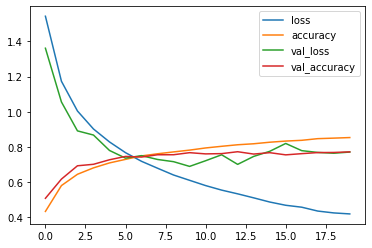

In [18]:
pd.DataFrame(history3.history).plot()

In [22]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model5.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 273s 5ms/sample - loss: 1.5894 - accuracy: 0.4517 - val_loss: 1.1002 - val_accuracy: 0.6123
Epoch 2/20
50000/50000 [==============================] - 245s 5ms/sample - loss: 1.0636 - accuracy: 0.6245 - val_loss: 1.0809 - val_accuracy: 0.6423
Epoch 3/20
50000/50000 [==============================] - 249s 5ms/sample - loss: 0.8996 - accuracy: 0.6895 - val_loss: 0.7497 - val_accuracy: 0.7410
Epoch 4/20
50000/50000 [==============================] - 243s 5ms/sample - loss: 0.7977 - accuracy: 0.7250 - val_loss: 0.7280 - val_accuracy: 0.7482
Epoch 5/20
50000/50000 [==============================] - 250s 5ms/sample - loss: 0.7179 - accuracy: 0.7539 - val_loss: 0.7421 - val_accuracy: 0.7484
Epoch 6/20
50000/50000 [==============================] - 261s 5ms/sample - loss: 0.6643 - accuracy: 0.7724 - val_loss: 0.5932 - val_accuracy: 0.7981
Epoch 7/20
50000/50000 [==========================

In [ ]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))